# K Nearest Neighbours:

- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.


- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.


- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.


- KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

### How does K-NN work?

The K-NN working can be explained on the basis of the below algorithm:

- Step-1: Select the number K of the neighbors

- Step-2: Calculate the Euclidean distance of K number of neighbors

- Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

- Step-4: Among these k neighbors, count the number of the data points in each category.

- Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

- Step-6: Our model is ready.

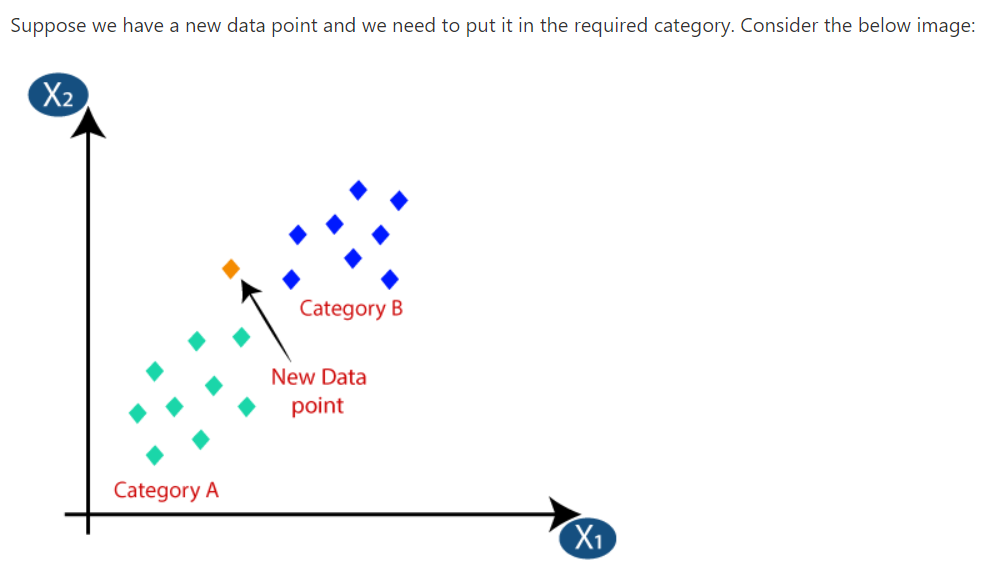

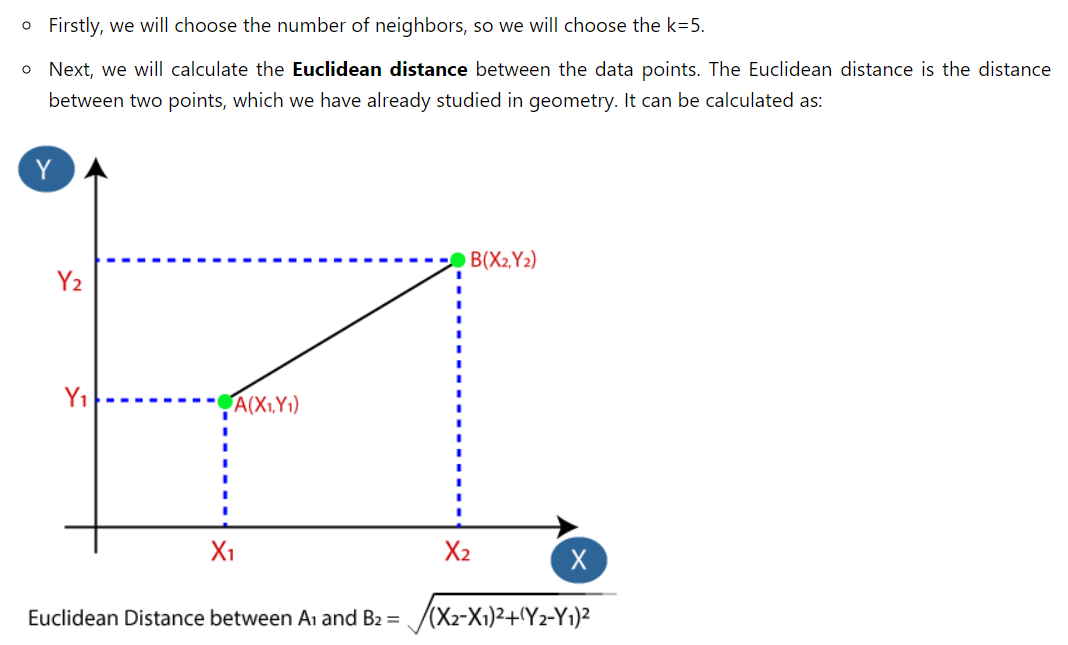

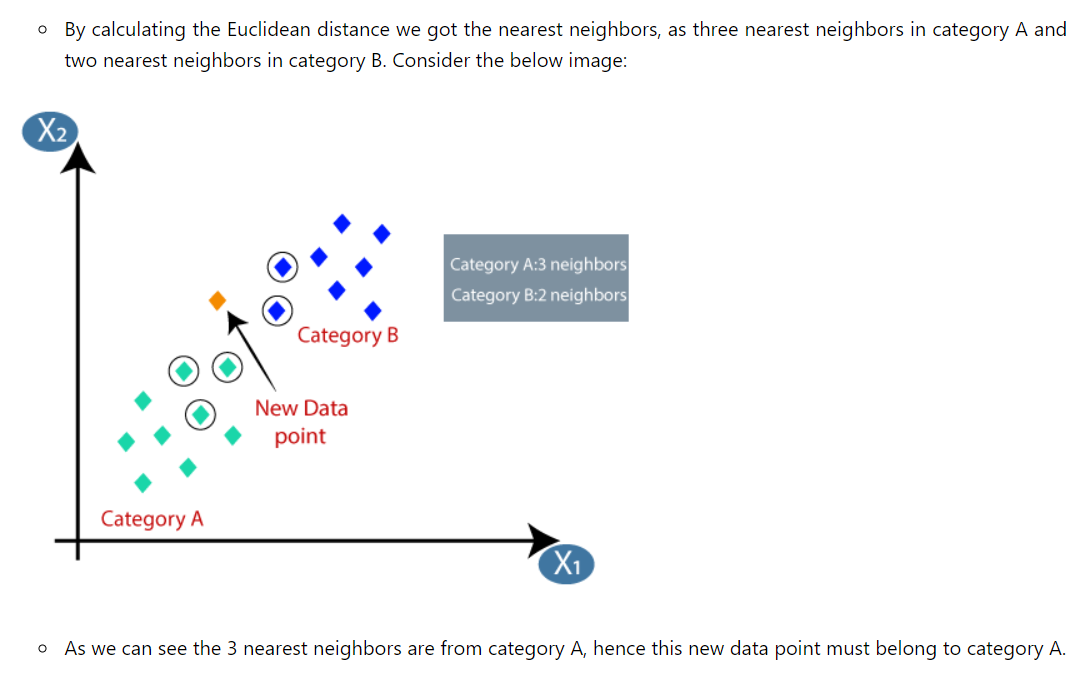

# Cancer Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [2]:
df = pd.read_csv("gene_expression.csv")

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.shape

(3000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [7]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

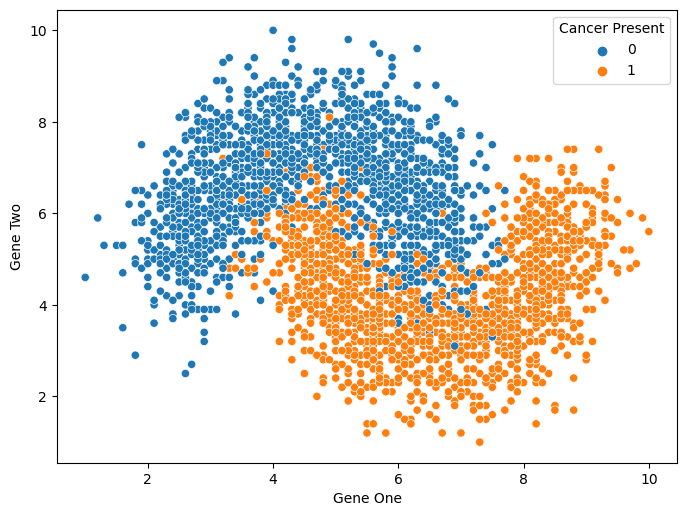

In [8]:
plt.figure(figsize=(8,6), dpi= 100)
sns.scatterplot(data= df, x= "Gene One", y= "Gene Two", hue= "Cancer Present")
plt.show()

### Train Test Split:

In [9]:
# Features:

x = df.drop("Cancer Present", axis= 1)

In [10]:
x.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [11]:
# Target:

y = df["Cancer Present"]

In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Cancer Present, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 2)
(600, 2)
(2400,)
(600,)


### Scalling:

In [16]:
sc = StandardScaler()

In [17]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,Gene One,Gene Two
0,-0.492691,0.541866
1,0.162078,0.657453
2,0.271206,0.195102
3,1.799002,-0.440630
4,-1.365717,-0.440630


In [18]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,Gene One,Gene Two
0,1.144232,-0.729599
1,-0.165307,-1.480919
2,1.799002,-0.671805
3,-1.256589,0.195102
4,-0.492691,1.119804


### Model:

In [19]:
knn_model = KNeighborsClassifier()

In [20]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
pred = knn_model.predict(x_test)

In [22]:
accuracy_score(y_test, pred)

0.9183333333333333

In [23]:
precision_score(y_test, pred)

0.9176029962546817

In [24]:
recall_score(y_test, pred)

0.9007352941176471

In [25]:
confusion_matrix(y_test, pred)

array([[306,  22],
       [ 27, 245]], dtype=int64)

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       328
           1       0.92      0.90      0.91       272

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



### How to Select Optimal Value of K:

Default value for K in K Neighbours Classifier is 5.

How to Select Which Value of K gives Best Accuracy?

There are two Methods to find Out Optimal K Value for Model.

#### 1) Elbow Method:

Here, We check Error Rate (1-Accuracy) of KNN Models for Different K Values and Select Optimal K Value keeping in mind the
Error rate and The Complexity of model.

In [32]:
# Getting Error Rates of Different Models with Different K Values and Comparing Them:

error_rates = []

for k in range(1,25):
    
    model = KNeighborsClassifier(n_neighbors= k)
    
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test)
    
    error = 1 - accuracy_score(y_test, predictions)
    
    error_rates.append(error)

In [33]:
error_rates

[0.09999999999999998,
 0.09833333333333338,
 0.07333333333333336,
 0.07999999999999996,
 0.08166666666666667,
 0.07833333333333337,
 0.07166666666666666,
 0.07166666666666666,
 0.06499999999999995,
 0.06499999999999995,
 0.07166666666666666,
 0.06833333333333336,
 0.06666666666666665,
 0.06333333333333335,
 0.06499999999999995,
 0.06333333333333335,
 0.06499999999999995,
 0.06499999999999995,
 0.05833333333333335,
 0.06166666666666665,
 0.06000000000000005,
 0.05500000000000005,
 0.06166666666666665,
 0.05833333333333335]

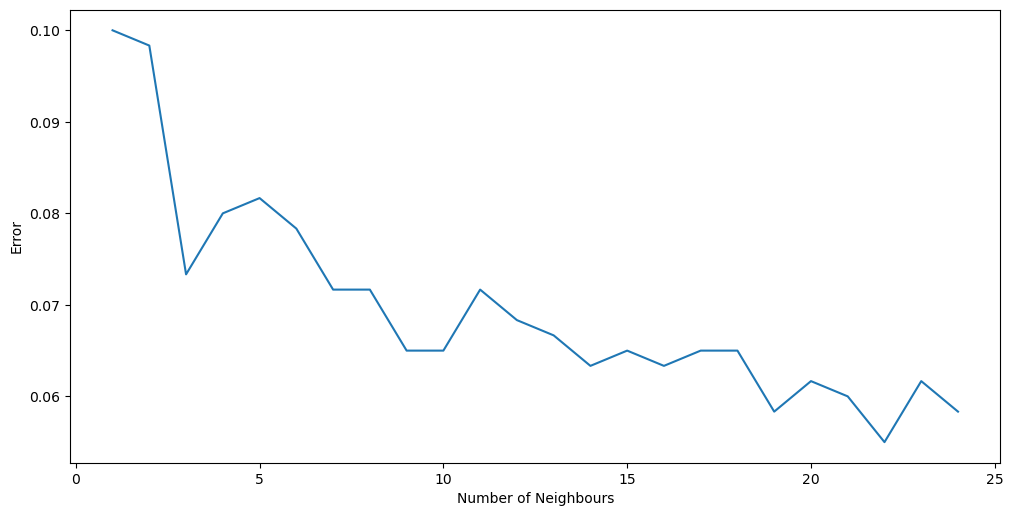

In [37]:
plt.figure(figsize=(12,6), dpi= 100)

plt.plot(range(1,25), error_rates)
plt.ylabel("Error")
plt.xlabel("Number of Neighbours")
plt.show()

In [38]:
# Here, we can see that for values of K > 13, Error rate Doesn't Drop Significantly.
# Model Complexity Increases with the Increase in K Value.

# We should Chose K somewhere around 13-15 to get low Error Rate as well as Less Complex Model (Optimal Value of K).

#### 2) Grid Search:

In [39]:
model = KNeighborsClassifier()

In [40]:
param_dict = {"n_neighbors" : list(range(1,25)), 
             "metric" : ["euclidean", "cosine", "manhattan","minkowski"]}

In [41]:
grid_model = GridSearchCV(estimator= model, param_grid= param_dict, cv= 5)

In [42]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]})

In [43]:
grid_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 20}

In [44]:
grid_model.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [45]:
grid_model.best_score_

0.9354166666666666

In [46]:
pred = grid_model.predict(x_test)

In [47]:
accuracy_score(y_test, pred)

0.9383333333333334

In [48]:
precision_score(y_test, pred)

0.9368029739776952

In [50]:
recall_score(y_test, pred)

0.9264705882352942

In [51]:
confusion_matrix(y_test, pred)

array([[311,  17],
       [ 20, 252]], dtype=int64)

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       328
           1       0.94      0.93      0.93       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



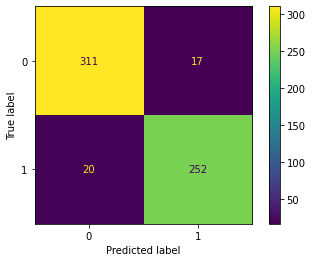

In [53]:
plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

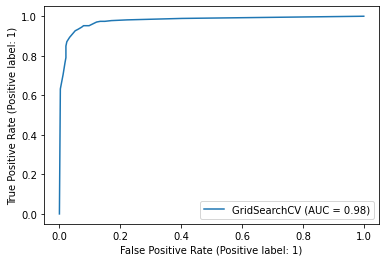

In [54]:
plot_roc_curve(grid_model, x_test, y_test)
plt.show()

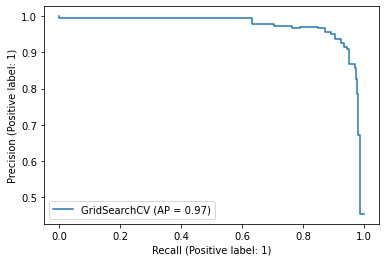

In [55]:
plot_precision_recall_curve(grid_model, x_test, y_test)
plt.show()

In [56]:
# We can also Plot Error rates for Different Values of K for Different Distance Metrics:

pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003397,0.001021,0.016948,0.001415,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.895833,0.906250,0.883333,0.908333,0.904167,0.899583,0.009167,71
1,0.002593,0.000489,0.016156,0.000755,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.906250,0.916667,0.897917,0.908333,0.908333,0.907500,0.005980,67
2,0.002394,0.000489,0.016760,0.000403,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.920833,0.933333,0.900000,0.922917,0.927083,0.920833,0.011258,62
3,0.002588,0.000485,0.016356,0.000488,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.927083,0.931250,0.893750,0.925000,0.920833,0.919583,0.013346,65
4,0.002584,0.000492,0.015761,0.000405,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.935417,0.941667,0.902083,0.933333,0.935417,0.929583,0.014031,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.002592,0.000489,0.017542,0.000502,minkowski,20,"{'metric': 'minkowski', 'n_neighbors': 20}",0.947917,0.950000,0.916667,0.929167,0.933333,0.935417,0.012360,1
92,0.002798,0.000388,0.017553,0.000489,minkowski,21,"{'metric': 'minkowski', 'n_neighbors': 21}",0.947917,0.945833,0.912500,0.927083,0.937500,0.934167,0.013084,4
93,0.002593,0.000488,0.018152,0.000413,minkowski,22,"{'metric': 'minkowski', 'n_neighbors': 22}",0.947917,0.945833,0.908333,0.931250,0.931250,0.932917,0.014154,13
94,0.002787,0.000396,0.017553,0.000499,minkowski,23,"{'metric': 'minkowski', 'n_neighbors': 23}",0.945833,0.943750,0.912500,0.925000,0.935417,0.932500,0.012402,15


In [61]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_metric', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [63]:
results = pd.DataFrame(grid_model.cv_results_)

In [64]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003397,0.001021,0.016948,0.001415,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.895833,0.906250,0.883333,0.908333,0.904167,0.899583,0.009167,71
1,0.002593,0.000489,0.016156,0.000755,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.906250,0.916667,0.897917,0.908333,0.908333,0.907500,0.005980,67
2,0.002394,0.000489,0.016760,0.000403,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.920833,0.933333,0.900000,0.922917,0.927083,0.920833,0.011258,62
3,0.002588,0.000485,0.016356,0.000488,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.927083,0.931250,0.893750,0.925000,0.920833,0.919583,0.013346,65
4,0.002584,0.000492,0.015761,0.000405,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.935417,0.941667,0.902083,0.933333,0.935417,0.929583,0.014031,36


In [66]:
results[results["param_metric"] == "euclidean"][["param_n_neighbors","mean_test_score"]]

,param_n_neighbors,mean_test_score
0,1,0.899583
1,2,0.907500
2,3,0.920833
3,4,0.919583
4,5,0.929583
5,6,0.928333
6,7,0.930833
7,8,0.928333
8,9,0.926667
9,10,0.924583


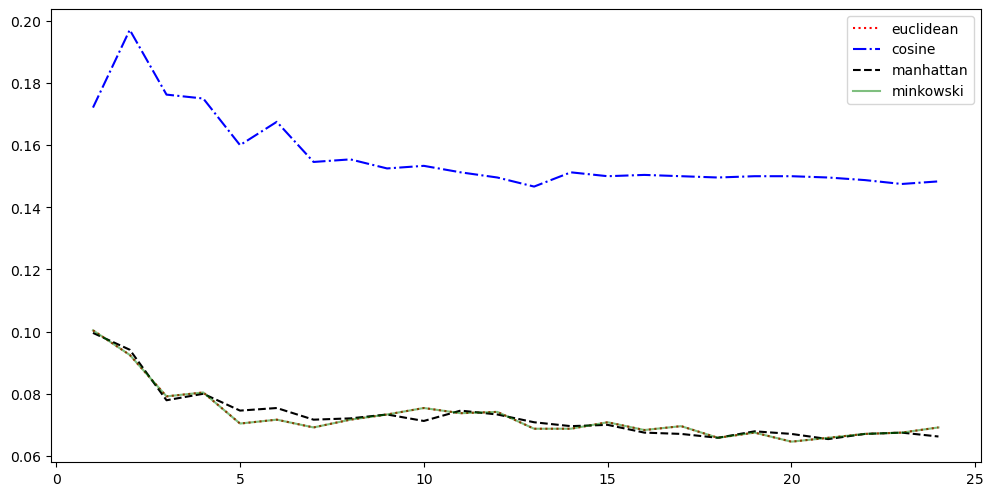

In [80]:
plt.figure(figsize=(12,6), dpi= 100)

plt.plot(results[results["param_metric"] == "euclidean"]["param_n_neighbors"],
    1 - results[results["param_metric"] == "euclidean"]["mean_test_score"], color= "red", linestyle= ":", label= "euclidean")

plt.plot(results[results["param_metric"] == "cosine"]["param_n_neighbors"],
    1 - results[results["param_metric"] == "cosine"]["mean_test_score"], color= "blue", linestyle= "-.", label= "cosine")

plt.plot(results[results["param_metric"] == "manhattan"]["param_n_neighbors"],
     1 - results[results["param_metric"] == "manhattan"]["mean_test_score"], color= "black", linestyle= "--", label= "manhattan")

plt.plot(results[results["param_metric"] == "minkowski"]["param_n_neighbors"],
    1 - results[results["param_metric"] == "minkowski"]["mean_test_score"], color= "green", linestyle= "-", label= "minkowski",
        alpha= 0.5)

plt.legend()

plt.show()